<a href="https://colab.research.google.com/github/SubhashShanmuka/Supply-Chain-projects/blob/main/SCM_Intern_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SCM Project-Multi Supplier Model**

This Collab file is the code for the Multi-supplier model developed based on [Paper Link](https://doi.org/10.1016/j.jclepro.2022.135642).



---


Several improvements were made to these model:

*   Multiple suppliers and manufacturers are added
*   Model T and alpha values were found correctly
*   Sensitivity analysis was done for more variables
*   More graphs were created





# **Integrated Profit study**

In [ ]:
import numpy as pn
from scipy.optimize import minimize
import pandas as pd

# Constants definition
R_o = 4
n = 7
p_r0 = 4
b = -2
R_h = 0.2
lambda_ro = 10
a = 40
M_a = 50
lambda_mo_1 = 2
lambda_mo_2 = 1
lambda_mo_3 = 3
lambda_mo = lambda_mo_1 + lambda_mo_2 + lambda_mo_3

lambda_so_1 = 1
lambda_so_2 = 1
lambda_so_3 = 0
lambda_so = lambda_so_1 + lambda_so_2 + lambda_so_3

g1 = 2
g2 = 1
M_o = 20
h_o = 0.8
S_h = 0.6
S_o = 40
S_p = 150
M_p = 120
M_h = 0.4
K = 0.8
eta = 0.8
xi = 0.7
psi = 0.8
phi = 0.8
J = 2000
S_a = 100
d1 = 1
d2 = 2
n_m = 2
n_s = 2
W_r = 1
R = 2
C_r = 2
p_mo = 5
p_so = 5
W = 2

#Function definitions
def RTP(T, alpha):
    OC_r = R_o / T
    HC_r = R_h * (T * (lambda_ro + a * alpha)) / 2
    TC_r = n * (OC_r + HC_r)
    RTP = n * (p_r0 + b * alpha) * (lambda_ro + a * alpha) - TC_r
    return RTP
    pass

def MTP(T, alpha, G, mu, delta):
    SC_m = M_a / (d2 * T)
    Q_m = d2 * T * (lambda_mo + a * alpha)
    OC_m = M_o * g2 / (d2 * T)
    G_m = Q_m / g2
    HCM_r = S_h * (d2 * T * (lambda_mo + a * alpha)**2) / (2 * g2 * M_p)
    IHC_m = ((M_h * T) / 2) * (((2 - d2) * (lambda_mo + a * alpha)**2 / M_p) + ((d2 - 1) * (lambda_mo + a * alpha)))
    RWC_m = R * pn.exp(-psi * mu) * C_r * (lambda_mo + a * alpha) + mu
    REC_m = K * (lambda_mo + a * alpha) * eta * (1 - xi * (1 - pn.exp(-psi * G))) + G - eta * J
    TC_m = SC_m + OC_m + HCM_r + IHC_m + REC_m + RWC_m
    MTP = (lambda_mo + a * alpha) * (p_mo + b * alpha) - TC_m
    return MTP
    pass

def STP(T, alpha, G, mu, delta):
    SC_s = S_a / (d1 * d2 * T)
    Q_s = d1 * d2 * T * (lambda_so + a * alpha)
    OC_s = S_o * g1 / (d1 * d2 * T)
    G_s = Q_s / g1
    HCS_r = (h_o * d1 * d2 * T * (lambda_so + a * alpha)**2) / (2 * g1 * S_p)
    IHC_s = (S_h * d2 * T / 2) * (((2 / g2) - d1) * (lambda_so + a * alpha)**2 / S_p + (1 - (1 / g2)) * (lambda_so + a * alpha)**2 / M_p + (d1 - 1) * (lambda_so + a * alpha))
    REC_s = K * (lambda_so + a * alpha) * eta * (1 - xi * (1 - pn.exp(-psi * G))) + G - eta * J
    RWTC_s = G - eta * J + (W * pn.exp(-phi * delta)) * (W_r * (lambda_so + a * alpha)) + delta
    TC_s = SC_s + OC_s + HCS_r + IHC_s + REC_s + RWTC_s
    STP = n_s*((lambda_so + a * alpha) * (p_so + b * alpha) - TC_s)
    return STP
    pass

def ITP(T, alpha, G, mu, delta):
    RTP_value = RTP(T, alpha)
    MTP_value = MTP(T, alpha, G, mu, delta)
    STP_value = STP(T, alpha, G, mu, delta)
    return RTP_value + MTP_value + STP_value

# Defining maximum values and initializations
MAX_G = 7
MAX_MU = 7
MAX_DELTA = 7

optimal_T = None
optimal_alpha = None
optimal_G = None
optimal_mu = None
optimal_delta = None
highest_profit = -float('inf')
results = []

# Creating an empty DataFrame to store results
columns = ['T', 'alpha', 'G', 'mu', 'delta', 'ITP', 'RWC_m', 'REC_m', 'REC_s', 'RWTC_s']

# Loop through G values
for G in range(MAX_G + 1):
    # Loop through mu values
    for mu in range(MAX_MU + 1):
        # Initialize variables to store optimal delta for this mu
        optimal_delta_mu = None

        # Loop through delta values
        for delta in range(MAX_DELTA + 1):
            # Find optimal T and alpha for the current combination of G, mu, and delta
            res = minimize(lambda x: -ITP(x[0], x[1], G, mu, delta),
                           [1.65, 0.86],  # Initial guess for T and alpha
                           bounds=[(0, None), (0, 1)],  # Bounds for T and alpha
                           method='trust-constr')
            optimal_T, optimal_alpha = res.x

            # Calculate additional variables
            RWC_m_value = R * pn.exp(-psi * mu) * C_r * (lambda_mo + a * optimal_alpha) + mu
            REC_m_value = K * (lambda_mo + a * optimal_alpha) * eta * (1 - xi * (1 - pn.exp(-psi * G))) + G + eta * J
            REC_s_value =n_s*( K * (lambda_so + a * optimal_alpha) * eta * (1 - xi * (1 - pn.exp(-psi * G))) + G - eta * J)
            RWTC_s_value =n_s*( G - eta * J + (W * pn.exp(-phi * delta)) * (W_r * (lambda_so + a * optimal_alpha)) + delta)

            # Calculating ITP with optimal T and alpha
            ITP_value = ITP(optimal_T, optimal_alpha, G, mu, delta)

            # Appending the current results to the list
            results.append([optimal_T, optimal_alpha, G, mu, delta, ITP_value, RWC_m_value, REC_m_value, REC_s_value, RWTC_s_value])

            # Checking if the current ITP is higher than the highest profit
            if ITP_value > highest_profit:
                highest_profit = ITP_value
                optimal_G = G
                optimal_mu = mu
                optimal_delta = delta
                optimal_T = res.x[0]
                optimal_alpha = res.x[1]
                # Storing the optimal delta for this mu
                optimal_delta_mu = delta

        # Storing the optimal delta for this mu
        if optimal_delta_mu is not None:
            optimal_delta_g = optimal_delta_mu

    # Storing the optimal mu and delta for this G
    if optimal_delta_g is not None:
        optimal_mu_g = mu
        optimal_delta_g = optimal_delta_mu

# Creating DataFrame from the results list
columns = ['T', 'alpha', 'G', 'mu', 'delta', 'ITP', 'RWC_m', 'REC_m', 'REC_s', 'RWTC_s']
results_df = pd.DataFrame(results, columns=columns)

# Printing the results DataFrame
print(results_df)

# Printing the optimal parameters and highest profit
print("\nOptimal G:", optimal_G)
print("Optimal mu:", optimal_mu)
print("Optimal delta:", optimal_delta)
print("Highest profit:", highest_profit)

file_path = 'output_ITP.csv'
results_df.to_csv(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


            T     alpha  G  mu  delta          ITP       RWC_m        REC_m  \
0    2.337864  0.615051  0   0      0  8496.515043  122.408150  1619.585304   
1    2.231199  0.670675  0   0      1  8555.561952  131.308002  1621.009280   
2    2.186572  0.695644  0   0      2  8582.587197  135.303095  1621.648495   
3    2.167131  0.706859  0   0      3  8593.950898  137.097513  1621.935602   
4    2.158515  0.711898  0   0      4  8598.020551  137.903645  1622.064583   
..        ...       ... ..  ..    ...          ...         ...          ...   
507  1.959851  0.840953  7   7      3  8745.149331    7.586305  1614.676183   
508  1.952879  0.845980  7   7      4  8750.290736    7.589280  1614.715125   
509  1.949763  0.848239  7   7      5  8751.512660    7.590616  1614.732622   
510  1.948366  0.849254  7   7      6  8750.963005    7.591217  1614.740484   
511  1.947740  0.849710  7   7      7  8749.615220    7.591486  1614.744016   

           REC_s       RWTC_s  
0   -3165.949392 -3

# **ITP vs G vs delta**

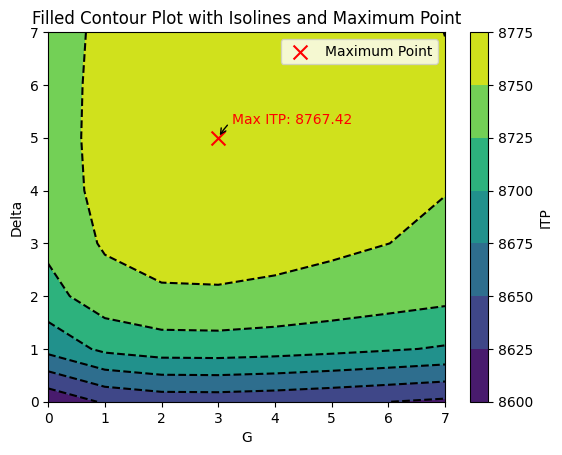

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for G and delta
G_range = np.arange(0, 8)
delta_range = np.arange(0, 8)

# Create a grid of values for G and delta
G, delta = np.meshgrid(G_range, delta_range)

# Calculate the ITP values using the given function
ITP_values = np.zeros_like(G, dtype=float)
for i in range(len(G_range)):
    for j in range(len(delta_range)):
        ITP_values[j, i] = ITP(optimal_T, optimal_alpha, G_range[i], optimal_mu, delta_range[j])

# Find the maximum value and its coordinates
max_ITP = np.max(ITP_values)
max_idx = np.unravel_index(np.argmax(ITP_values), ITP_values.shape)
max_G = G_range[max_idx[1]]
max_delta = delta_range[max_idx[0]]

# Create the filled contour plot
fig, ax = plt.subplots()
contour_filled = ax.contourf(G, delta, ITP_values, cmap='viridis')

# Add isolines (contour lines)
contour_lines = ax.contour(G, delta, ITP_values, colors='black', linestyles='dashed')

# Add a marker at the maximum point
ax.scatter(max_G, max_delta, color='red', marker='x', s=100, label='Maximum Point')

# Add the ITP value at the maximum point
ax.annotate(f'Max ITP: {max_ITP:.2f}', (max_G, max_delta), xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
            fontsize=10, color='red')

# Add a colorbar
plt.colorbar(contour_filled, ax=ax, label='ITP')

# Add title, labels, and legend
plt.title('Filled Contour Plot with Isolines and Maximum Point')
plt.xlabel('G')
plt.ylabel('Delta')
plt.legend()

# Show the plot
plt.show()


# **ITP vs G vs mu**

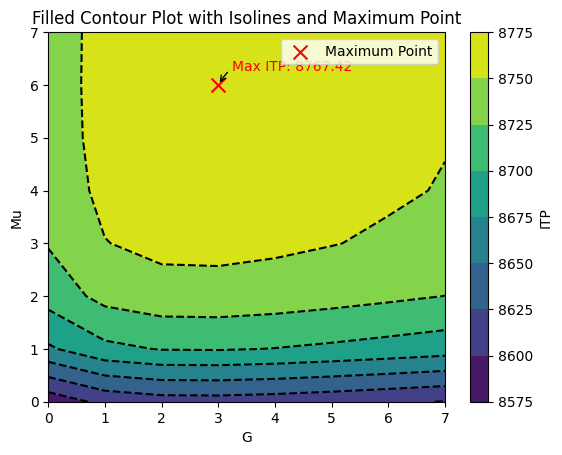

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for G and mu
G_range = np.arange(0, 8)
mu_range = np.arange(0, 8)

# Create a grid of values for G and mu
G, mu = np.meshgrid(G_range, mu_range)

# Calculate the ITP values using the given function
ITP_values = np.zeros_like(G, dtype=float)
for i in range(len(G_range)):
    for j in range(len(mu_range)):
        ITP_values[j, i] = ITP(optimal_T, optimal_alpha, G_range[i], mu_range[j], optimal_delta)

# Find the maximum value and its coordinates
max_ITP = np.max(ITP_values)
max_idx = np.unravel_index(np.argmax(ITP_values), ITP_values.shape)
max_G = G_range[max_idx[1]]
max_mu = mu_range[max_idx[0]]

# Create the filled contour plot
fig, ax = plt.subplots()
contour_filled = ax.contourf(G, mu, ITP_values, cmap='viridis')

# Add isolines (contour lines)
contour_lines = ax.contour(G, mu, ITP_values, colors='black', linestyles='dashed')

# Add a marker at the maximum point
ax.scatter(max_G, max_mu, color='red', marker='x', s=100, label='Maximum Point')

# Add the ITP value at the maximum point
ax.annotate(f'Max ITP: {max_ITP:.2f}', (max_G, max_mu), xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
            fontsize=10, color='red')

# Add a colorbar
plt.colorbar(contour_filled, ax=ax, label='ITP')

# Add title, labels, and legend
plt.title('Filled Contour Plot with Isolines and Maximum Point')
plt.xlabel('G')
plt.ylabel('Mu')
plt.legend()

# Show the plot
plt.show()


relation between ITP T and alpha

<ipython-input-1-75b279dec447>:53: RuntimeWarning: divide by zero encountered in scalar divide
  OC_r = R_o / T
<ipython-input-1-75b279dec447>:61: RuntimeWarning: divide by zero encountered in scalar divide
  SC_m = M_a / (d2 * T)
<ipython-input-1-75b279dec447>:63: RuntimeWarning: divide by zero encountered in scalar divide
  OC_m = M_o * g2 / (d2 * T)
<ipython-input-1-75b279dec447>:75: RuntimeWarning: divide by zero encountered in scalar divide
  SC_s = S_a / (d1 * d2 * T)
<ipython-input-1-75b279dec447>:77: RuntimeWarning: divide by zero encountered in scalar divide
  OC_s = S_o * g1 / (d1 * d2 * T)


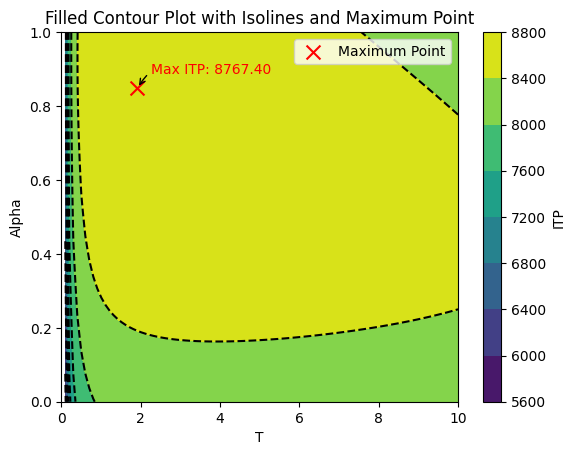

1.9191919191919191
0.8484848484848485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for T and alpha
T_range = np.linspace(0, 10, 100)
alpha_range = np.linspace(0, 1, 100)

# Create a grid of values for T and alpha
T, alpha = np.meshgrid(T_range, alpha_range)

# Calculate the ITP values using the given function
ITP_values = np.zeros_like(T, dtype=float)
for i in range(len(T_range)):
    for j in range(len(alpha_range)):
        ITP_values[j, i] = ITP(T_range[i], alpha_range[j], optimal_G, optimal_mu, optimal_delta)

# Find the maximum value and its coordinates
max_ITP = np.max(ITP_values)
max_idx = np.unravel_index(np.argmax(ITP_values), ITP_values.shape)
max_T = T_range[max_idx[1]]
max_alpha = alpha_range[max_idx[0]]

# Create the filled contour plot
fig, ax = plt.subplots()
contour_filled = ax.contourf(T, alpha, ITP_values, cmap='viridis')

# Add isolines (contour lines)
contour_lines = ax.contour(T, alpha, ITP_values, colors='black', linestyles='dashed')

# Add a marker at the maximum point
ax.scatter(max_T, max_alpha, color='red', marker='x', s=100, label='Maximum Point')

# Add the ITP value at the maximum point
ax.annotate(f'Max ITP: {max_ITP:.2f}', (max_T, max_alpha), xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
            fontsize=10, color='red')

# Add a colorbar
plt.colorbar(contour_filled, ax=ax, label='ITP')

# Add title, labels, and legend
plt.title('Filled Contour Plot with Isolines and Maximum Point')
plt.xlabel('T')
plt.ylabel('Alpha')
plt.legend()

# Show the plot
plt.show()

print(max_T)
print(max_alpha)

# **Supplier Profit study**

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Constants definition
R_o = 4
n = 7
p_r0 = 4
b = -2
R_h = 0.2
lambda_ro = 10
a = 50
M_a = 2

lambda_mo_1 = 2
lambda_mo_2 = 1
lambda_mo_3 = 3
lambda_mo = lambda_mo_1 + lambda_mo_2 + lambda_mo_3

lambda_so_1 = 1
lambda_so_2 = 1
lambda_so_3 = 0
lambda_so = lambda_so_1 + lambda_so_2 + lambda_so_3

g1 = 2
g2 = 1
M_o = 20
h_o = 0.8
S_h = 0.6
S_o = 40
S_p = 150
M_p = 120
M_h = 0.4
K = 0.8
eta = 0.8
xi = 0.7
psi = 0.8
phi = 0.8
J = 2000
S_a = 100
d1 = 1
d2 = 2
n_m = 2
n_s = 2
W_r = 1
R = 2
C_r = 2
p_mo = 5
p_so = 5
W = 2

def STP(T, alpha, G, delta):
    SC_s = S_a / (d1 * d2 * T)
    Q_s = d1 * d2 * T * (lambda_so + a * alpha)
    OC_s = S_o * g1 / (d1 * d2 * T)
    G_s = Q_s / g1
    HCS_r = (h_o * d1 * d2 * T * (lambda_so + a * alpha)**2) / (2 * g1 * S_p)
    IHC_s = (S_h * d2 * T / 2) * (((2 / g2) - d1) * (lambda_so + a * alpha)**2 / S_p + (1 - (1 / g2)) * (lambda_so + a * alpha)**2 / M_p + (d1 - 1) * (lambda_so + a * alpha))
    REC_s = K * (lambda_so + a * alpha) * eta * (1 - xi * (1 - np.exp(-psi * G))) + G - eta * J
    RWTC_s = G - eta * J + (W * np.exp(-phi * delta)) * (W_r * (lambda_so + a * alpha)) + delta
    TC_s = SC_s + OC_s + HCS_r + IHC_s + REC_s + RWTC_s
    STP =n_s*( (lambda_so + a * alpha) * (p_so + b * alpha) - TC_s)
    return STP

# Initializing variables to store optimal parameters and highest profit
MAX_G = 7
MAX_DELTA = 7

optimal_T = None
optimal_alpha = None
optimal_G = None
optimal_delta = None
highest_profit = -float('inf')
results = []

# Creating an empty DataFrame to store results
columns = ['T', 'alpha', 'G', 'delta', 'STP', 'REC_s', 'RWTC_s']

# Looping through G values
for G in range(MAX_G + 1):
    # Looping through delta values
    for delta in range(MAX_DELTA + 1):
        # Finding optimal T and alpha for the current combination of G and delta
        res = minimize(lambda x: -STP(x[0], x[1], G, delta),
                       [1.65, 0.86],  # Initial guess for T and alpha
                       bounds=[(0, None), (0, 1)],  # Bounds for T and alpha
                       method='trust-constr')
        optimal_T, optimal_alpha = res.x

        # Calculate additional variables
        REC_s_value = K * (lambda_so + a * optimal_alpha) * eta * (1 - xi * (1 - np.exp(-psi * G))) + G - eta * J
        RWTC_s_value = G - eta * J + (W * np.exp(-phi * delta)) * (W_r * (lambda_so + a * optimal_alpha)) + delta

        # Calculating STP with optimal T and alpha
        STP_value = STP(optimal_T, optimal_alpha, G, delta)

        # Checking if the current STP is higher than the highest profit
        if STP_value > highest_profit:
            highest_profit = STP_value
            optimal_G = G
            optimal_delta = delta

        # Appending the current results to the list
        results.append([optimal_T, optimal_alpha, G, delta, STP_value, REC_s_value, RWTC_s_value])

# Creating DataFrame from the results list
columns = ['T', 'Alpha', 'G', 'delta', 'STP', 'REC_s', 'RWTC_s']
results_df = pd.DataFrame(results, columns=columns)

# Seting pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Printing the results DataFrame
print(results_df)

# Printing the optimal parameters and highest profit
print("\nOptimal G:", optimal_G)
print("Optimal delta:", optimal_delta)
print("Highest profit:", highest_profit)

file_path = 'output_STP.csv'
results_df.to_csv(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


            T     Alpha  G  delta          STP        REC_s       RWTC_s
0   10.434537  0.182702  0      0  6409.919206 -1592.873545 -1577.729827
1    4.665898  0.458037  0      1  6447.608207 -1584.062811 -1576.621748
2    3.737481  0.581753  0      2  6473.315460 -1580.103892 -1585.447016
3    3.430746  0.637343  0      3  6485.758624 -1578.325036 -1590.855286
4    3.308732  0.662320  0      4  6490.650835 -1577.525747 -1593.137187
5    3.256688  0.673544  0      5  6491.828964 -1577.166599 -1593.693099
6    3.233835  0.678587  0      6  6491.273395 -1577.005226 -1593.408621
7    3.223669  0.680853  0      7  6489.925733 -1576.932717 -1592.733439
8    8.171533  0.244377  1      0  6412.174035 -1593.407745 -1570.562348
9    4.151761  0.519712  1      1  6456.655581 -1587.993278 -1572.850512
10   3.400193  0.643429  1      2  6485.414920 -1585.560397 -1583.201814
11   3.144431  0.699018  1      3  6499.229475 -1584.467239 -1589.295782
12   3.041628  0.723996  1      4  6504.737892 -158

# **STP vs G vs delta.**

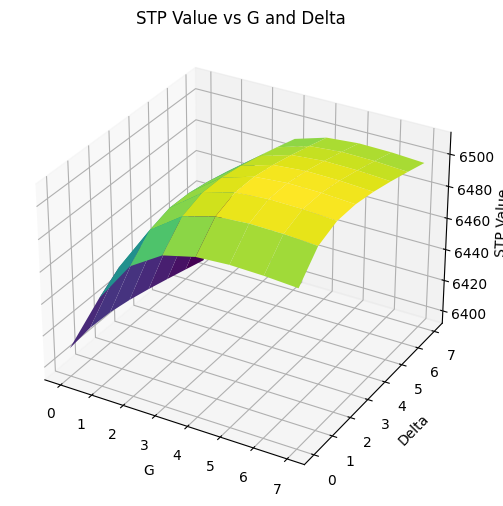

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting G, delta, and STP values from the results DataFrame
G_values = results_df['G']
delta_values = results_df['delta']
STP_values = results_df['STP']

# Creating meshgrid for G and delta
G_mesh, delta_mesh = np.meshgrid(np.unique(G_values), np.unique(delta_values))

# Reshaping STP_values to match the shape of G_mesh and delta_mesh
STP_values_reshaped = np.reshape(STP_values.to_numpy(), G_mesh.shape)

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(G_mesh, delta_mesh, STP_values_reshaped, cmap='viridis')

# Setting labels and title
ax.set_xlabel('G')
ax.set_ylabel('Delta')
ax.set_zlabel('STP Value')
ax.set_title('STP Value vs G and Delta')

plt.show()


# **Manufacturer Profit Study**

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Constants definition
R_o = 4
n = 7
p_r0 = 4
b = -2
R_h = 0.2
lambda_ro = 10
a = 50
M_a = 40

lambda_mo_1 = 2
lambda_mo_2 = 1
lambda_mo_3 = 3
lambda_mo = lambda_mo_1 + lambda_mo_2 + lambda_mo_3

lambda_so_1 = 1
lambda_so_2 = 1
lambda_so_3 = 0
lambda_so = lambda_so_1 + lambda_so_2 + lambda_so_3

g1 = 2
g2 = 1
M_o = 20
h_o = 0.8
S_h = 0.6
S_o = 40
S_p = 150
M_p = 120
M_h = 0.4
K = 0.8
eta = 0.8
xi = 0.7
psi = 0.8
phi = 0.8
J = 2000
S_a = 100
d1 = 1
d2 = 2
n_m = 2
n_s = 2
W_r = 1
R = 2
C_r = 2
p_mo = 5
p_so = 5
W = 2

#Function definitions
def MTP(T, alpha, G, mu):
    SC_m = M_a / (d2 * T)
    Q_m = d2 * T * (lambda_mo + a * alpha)
    OC_m = M_o * g2 / (d2 * T)
    G_m = Q_m / g2
    HCM_r = S_h * (d2 * T * (lambda_mo + a * alpha)**2) / (2 * g2 * M_p)
    IHC_m = ((M_h * T) / 2) * (((2 - d2) * (lambda_mo + a * alpha)**2 / M_p) + ((d2 - 1) * (lambda_mo + a * alpha)))
    RWC_m = R * np.exp(-psi * mu) * C_r * (lambda_mo + a * alpha) + mu
    REC_m = K * (lambda_mo + a * alpha) * eta * (1 - xi * (1 - np.exp(-psi * G))) + G - eta * J
    TC_m = SC_m + OC_m + HCM_r + IHC_m + REC_m + RWC_m
    MTP = (lambda_mo + a * alpha) * (p_mo + b * alpha) - TC_m
    return MTP

# Define maximum values and initializations
MAX_G = 7
MAX_MU = 7
optimal_T = None
optimal_alpha = None
optimal_G = None
optimal_mu = None
highest_profit = -float('inf')
results = []

# Looping through G values
for G in range(MAX_G + 1):
    # Looping through mu values
    for mu in range(MAX_MU + 1):
        # Finding optimal T and alpha for the current combination of G and mu
        res = minimize(lambda x: -MTP(x[0], x[1], G, mu),
                       [1.65, 0.86],  # Initial guess for T and alpha
                       bounds=[(0, None), (0, 1)],  # Bounds for T and alpha
                       method='Trust-constr')
        optimal_T, optimal_alpha = res.x

        # Calculate additional variables
        RWC_m_value = R * np.exp(-psi * mu) * C_r * (lambda_mo + a * optimal_alpha) + mu
        REC_m_value = K * (lambda_mo + a * optimal_alpha) * eta * (1 - xi * (1 - np.exp(-psi * G))) + G + eta * J

        # Calculating MTP with optimal T and alpha
        MTP_value = MTP(optimal_T, optimal_alpha, G, mu)

        # Checking if the current MTP is higher than the highest profit
        if MTP_value > highest_profit:
            highest_profit = MTP_value
            optimal_G = G
            optimal_mu = mu

        # Appending the current results to the list
        results.append([optimal_T, optimal_alpha, G, mu, MTP_value, RWC_m_value, REC_m_value])

# Creating DataFrame from the results list
columns = ['T', 'Alpha', 'G', 'mu', 'MTP', 'RWC_m', 'REC_m']
results_df = pd.DataFrame(results, columns=columns)

# Seting pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Printing the results DataFrame
print(results_df)

# Printing the optimal parameters and highest profit
print("\nOptimal G:", optimal_G)
print("Optimal mu:", optimal_mu)
print("Highest profit:", highest_profit)

file_path = 'output_MTP.csv'
results_df.to_csv(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


           T         Alpha  G  mu          MTP      RWC_m        REC_m
0   4.662524  9.375093e-10  0   0  1589.291434  24.000000  1603.840000
1   1.966606  3.634871e-01  0   1  1612.867692  44.448953  1615.471588
2   1.449264  6.213405e-01  0   2  1642.214600  31.934812  1623.722895
3   1.302364  7.349773e-01  0   3  1658.963725  18.512359  1627.359274
4   1.246298  7.858092e-01  0   4  1666.759965  11.384556  1628.985896
5   1.222755  8.086133e-01  0   5  1669.877622   8.401629  1629.715626
6   1.212482  8.188533e-01  0   6  1670.761129   7.545305  1630.043306
7   1.207926  8.234531e-01  0   7  1670.614169   7.697752  1630.190501
8   4.662527  1.211037e-09  1   0  1589.771637  24.000000  1603.359796
9   1.800652  4.287909e-01  1   1  1618.235327  50.317529  1611.791956
10  1.363584  6.844779e-01  1   2  1650.748740  34.484256  1616.820032
11  1.233886  7.977179e-01  1   3  1668.897032  19.650698  1619.046894
12  1.183807  8.484197e-01  1   4  1677.319453  11.894985  1620.043944
13  1.

# **MTP vs G vs mu**

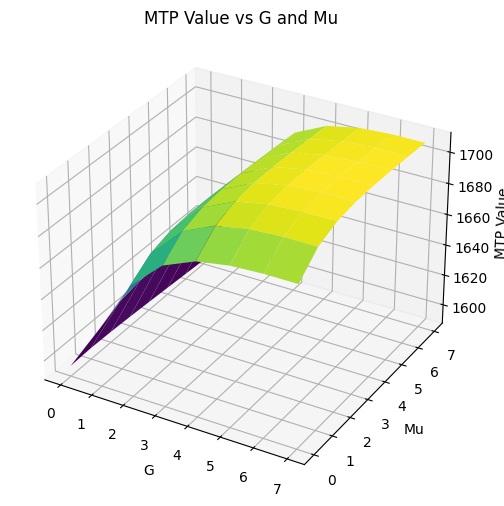

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting G, mu, and MTP values from the results DataFrame
G_values = results_df['G']
mu_values = results_df['mu']
MTP_values = results_df['MTP']

# Creating meshgrid for G and mu
G_mesh, mu_mesh = np.meshgrid(np.unique(G_values), np.unique(mu_values))

# Reshaping MTP_values to match the shape of G_mesh and mu_mesh
MTP_values_reshaped = np.reshape(MTP_values.to_numpy(), G_mesh.shape)

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(G_mesh, mu_mesh, MTP_values_reshaped, cmap='viridis')

# Setting labels and title
ax.set_xlabel('G')
ax.set_ylabel('Mu')
ax.set_zlabel('MTP Value')
ax.set_title('MTP Value vs G and Mu')

plt.show()

# **Retailer Profit Study**

Optimal Alpha: 0.8784681418137495
Optimal T: 0.8612740346265881
Optimal RTP: 781.6555059924898


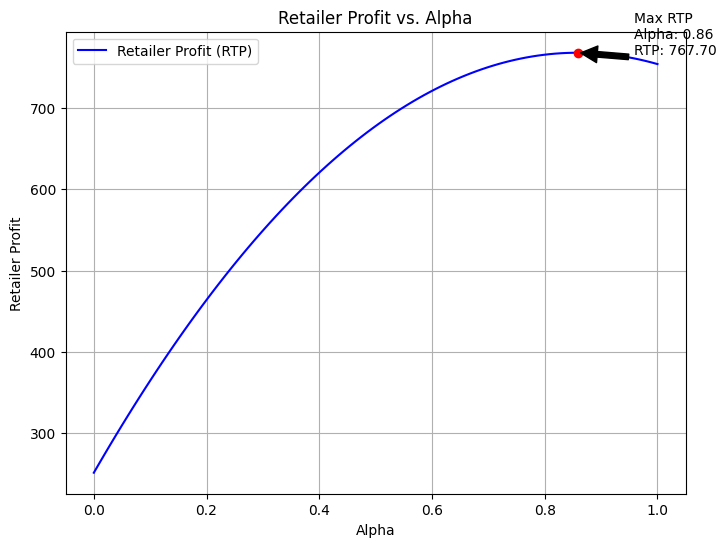

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants definition
R_o = 4
n = 7
p_r0 = 4
b = -2
R_h = 0.2
lambda_ro = 10
a = 50
M_a = 2
lambda_mo_1 = 2
lambda_mo_2 = 1
lambda_mo_3 = 3
lambda_mo = lambda_mo_1 + lambda_mo_2 + lambda_mo_3

lambda_so_1 = 1
lambda_so_2 = 1
lambda_so_3 = 0
lambda_so = lambda_so_1 + lambda_so_2 + lambda_so_3

g1 = 2
g2 = 1
M_o = 20
h_o = 0.8
S_h = 0.6
S_o = 40
S_p = 150
M_p = 120
M_h = 0.4
K = 0.8
eta = 0.8
xi = 0.7
psi = 0.8
phi = 0.8
J = 2000
S_a = 100
d1 = 1
d2 = 2
n_m = 2
n_s = 2
W_r = 1
R = 2
C_r = 2
p_mo = 5
p_so = 5
W = 2

#Function definitions
def RTP(T, alpha):
    OC_r = R_o / T
    HC_r = R_h * (T * (lambda_ro + a * alpha)) / 2
    TC_r = n * (OC_r + HC_r)
    RTP = n * (p_r0 + b * alpha) * (lambda_ro + a * alpha) - TC_r
    return RTP

# Defining the range of alpha values
alpha_values = np.linspace(0, 1, 100)  # Adjust the range as needed

# Defining a fixed value for T (you can adjust this as needed)
fixed_T = 1.65

# Calculating RTP for each alpha value
RTP_values = [RTP(fixed_T, alpha) for alpha in alpha_values]

# Ploting the RTP as a function of alpha
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, RTP_values, color='blue', label='Retailer Profit (RTP)')
plt.title('Retailer Profit vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Retailer Profit')
plt.grid(True)

# Finding optimal T and alpha
res = minimize(lambda x: -RTP(x[0], x[1]),
               [1.65, 0.86],  # Initial guess for T and alpha
               bounds=[(0, 11), (0, 1)],  # Bounds for T and alpha
               method='Trust-constr')
optimal_T, optimal_alpha = res.x

# Calculating optimal RTP
optimal_RTP = RTP(optimal_T, optimal_alpha)

# Finding the index of the maximum RTP value
max_index = np.argmax(RTP_values)
max_alpha = alpha_values[max_index]
max_RTP = RTP_values[max_index]

# Highlighting the maximum point on the graph and label it
plt.plot(max_alpha, max_RTP, 'ro')  # Mark the maximum point with a red circle
plt.annotate(f'Max RTP\nAlpha: {max_alpha:.2f}\nRTP: {max_RTP:.2f}',
             xy=(max_alpha, max_RTP),
             xytext=(max_alpha + 0.1, max_RTP - 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Printing optimal alpha, optimal T, and optimal RTP
print("Optimal Alpha:", optimal_alpha)
print("Optimal T:", optimal_T)
print("Optimal RTP:", optimal_RTP)

plt.legend()
plt.show()

# **RTP vs T vs alpha**

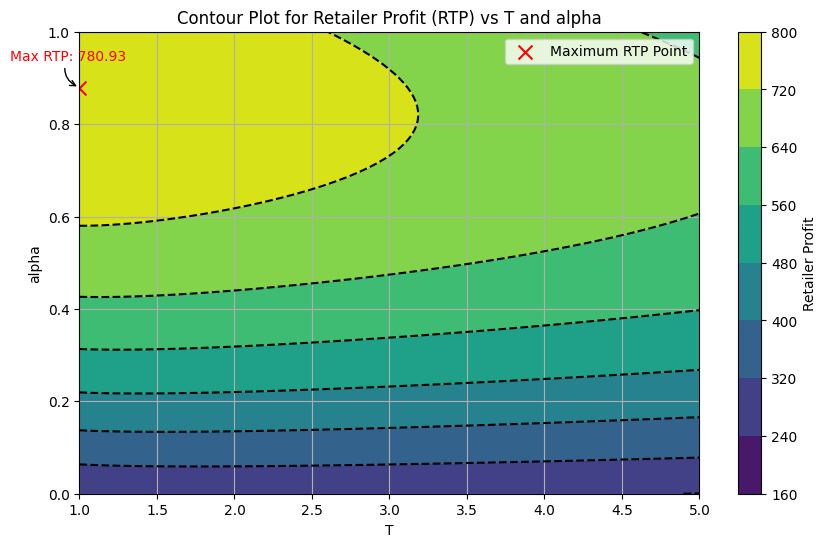

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants definition
R_o = 4
n = 7
p_r0 = 4
b = -2
R_h = 0.2
lambda_ro = 10
a = 50

# Function definitions
def RTP(T, alpha):
    OC_r = R_o / T
    HC_r = R_h * (T * (lambda_ro + a * alpha)) / 2
    TC_r = n * (OC_r + HC_r)
    RTP = n * (p_r0 + b * alpha) * (lambda_ro + a * alpha) - TC_r
    return RTP

# Define range for T and alpha values
T_range = np.linspace(1, 5, 100)  # Adjust the range as needed
alpha_range = np.linspace(0, 1, 100)   # Adjust the range as needed

# Create meshgrid for T and alpha
T, alpha = np.meshgrid(T_range, alpha_range)

# Calculate RTP values for each combination of T and alpha
RTP_values = RTP(T, alpha)

# Plot the contour plot with contour lines
plt.figure(figsize=(10, 6))
contour_plot = plt.contourf(T, alpha, RTP_values, cmap='viridis')
plt.colorbar(contour_plot, label='Retailer Profit')
plt.contour(T, alpha, RTP_values, colors='black', linestyles='dashed')  # Contour lines

# Find the maximum RTP value and its coordinates
max_RTP = np.max(RTP_values)
max_idx = np.unravel_index(np.argmax(RTP_values), RTP_values.shape)
max_T = T_range[max_idx[1]]
max_alpha = alpha_range[max_idx[0]]

# Mark the maximum RTP point
plt.scatter(max_T, max_alpha, color='red', marker='x', s=100, label='Maximum RTP Point')
plt.annotate(f'Max RTP: {max_RTP:.2f}', (max_T, max_alpha), xytext=(-50, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'), fontsize=10, color='red')

# Add title, labels, and legend
plt.title('Contour Plot for Retailer Profit (RTP) vs T and alpha')
plt.xlabel('T')
plt.ylabel('alpha')
plt.legend()
plt.grid(True)
plt.show()


New section - Sensitivity analysis
